<a href="https://colab.research.google.com/github/SukhandeepKaurShergill/Transfer-Learning/blob/main/Copy_of_dog_breed_classification_inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning 
# Using Inception V3 for Dog breed Classification










#1. Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#2. Import all the needed libraries for deep learning using keras

In [ ]:
from keras import regularizers
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation,Dense
from keras.models import Sequential,load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.inception_v3 import InceptionV3

#3. Import some basic pythob libraries for plotting and math operations

In [ ]:
# Pandas and Numpy for data structures and util fucntions
import numpy as np
import pandas as pd
from numpy.random import rand

pd.options.display.max_colwidth = 600

# Scikit Imports
from sklearn.model_selection import train_test_split

# Matplot Imports
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')


# 4. unzip the dataset stored in google drive

# 5. Path to the train folder containg images dataset

In [ ]:

train_folder = '/content/train/'
#test_folder = '/content/test/'

# 6. Read csv file to access the images and corresponding labels 

In [ ]:
data_labels = pd.read_csv('/content/labels.csv')
data_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


#7.  Choose a small set of data from whole dataset

In [ ]:
data_labels=data_labels[:3000]

# 8. Check Number of Classes in the Dataset
 The dataset contain 120 different dog breeds


In [ ]:
target_labels = data_labels['breed']
len(set(target_labels))

120

# 9.Prepare Labels
Deep Learning models work with one hot encoded outputs or target variables. We utilize pandas to prepare one hot encoding for the labels.


In [ ]:
labels_ohe_names = pd.get_dummies(target_labels, sparse=True)
labels_ohe = np.asarray(labels_ohe_names)
print(labels_ohe.shape)
print(labels_ohe[:2])

(3000, 120)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]


# 10.We add another column to the labels dataset to identify image path


In [ ]:
data_labels['image_path'] = data_labels.apply( lambda row: (train_folder + row["id"] + ".jpg" ), axis=1)
data_labels.head()

,id,breed,image_path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,/content/train/000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,/content/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,/content/train/001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,/content/train/00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,/content/train/0021f9ceb3235effd7fcde7f7538ed62.jpg


#11. Prepare Train-Test Datasets
We use a 70-30 split to prepare the two dataset.

In [ ]:
train_data = np.array([img_to_array(
                            load_img(img, 
                                     target_size=(299, 299))
                       ) for img 
                           in data_labels['image_path'].values.tolist()
                      ]).astype('float32')

#12. check shape of data

In [ ]:
train_data.shape

(3000, 299, 299, 3)

#13. Train and Test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data, 
                                                    target_labels, 
                                                    test_size=0.3, 
                                                    stratify=np.array(target_labels), 
                                                    random_state=42)

#14. check shape

In [ ]:
x_train.shape, x_test.shape

((2100, 299, 299, 3), (900, 299, 299, 3))

#15. From training data, further split int train and validation data

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                    y_train, 
                                                    test_size=0.15, 
                                                    stratify=np.array(y_train), 
                                                    random_state=42)



#16. check new data shape

In [ ]:
x_train.shape, x_val.shape


((1785, 299, 299, 3), (315, 299, 299, 3))

#17. Perfoem one hot encoding of labels

In [ ]:


y_train_ohe = pd.get_dummies(y_train, sparse=True)
y_train_ohe = np.asarray(y_train_ohe)

y_test_ohe = pd.get_dummies(y_test, sparse=True)
y_test_ohe = np.asarray(y_test_ohe)

y_val_ohe = pd.get_dummies(y_val, sparse=True)
y_val_ohe = np.asarray(y_val_ohe)

y_train_ohe.shape, y_test_ohe.shape, y_val_ohe.shape

((1785, 120), (900, 120), (315, 120))

#18. define batch size

In [ ]:
BATCH_SIZE = 32

# Data Augmentation
Since number of samples per class are not very high, we utilize data augmentation to prepare different variations of different samples available. We do this using the ImageDataGenerator utility from keras








#19. Create train generator.

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
train_generator = train_datagen.flow(x_train, y_train_ohe, shuffle=False, batch_size=BATCH_SIZE, seed=1)

#20. Create validation generator

In [ ]:

val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = train_datagen.flow(x_val, y_val_ohe, shuffle=False, batch_size=BATCH_SIZE, seed=1)

#21. Prepare Deep Learning Classifier

*   Load InceptionV3 pretrained on ImageNet without its top/classification layer
*   Add additional custom layers on top of InceptionV3 to prepare custom classifier





#22.Get the InceptionV3 model so we can do transfer learning

In [ ]:

base_inception = InceptionV3(weights='imagenet', include_top = False, input_shape=(299, 299, 3))

# 23. Fine Tuning

*   Add a global spatial average pooling layer
*   two fully connected layers 

In [ ]:

out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
total_classes = y_train_ohe.shape[1]
predictions = Dense(total_classes, activation='softmax')(out)

#24. create a new model


*   Stack the two models (InceptionV3 and custom layers) on top of each other
*   Compile the model and view its summary



In [ ]:
model = Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False

#25. Compile model and check summary

In [ ]:
# Compile 
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

# Model Training
We train the model with a Batch Size of 32 for just 15 Epochs.

The model utilizes the power of transfer learning to achieve a good accuracy

# 26. Train the model

In [ ]:

batch_size = BATCH_SIZE
train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=15,
                              verbose=1)

Epoch 1/15
55/55 [==============================] - 69s 981ms/step - loss: 4.5763 - accuracy: 0.0918 - val_loss: 4.2041 - val_accuracy: 0.2431
Epoch 2/15
55/55 [==============================] - 42s 770ms/step - loss: 3.6559 - accuracy: 0.4250 - val_loss: 3.0839 - val_accuracy: 0.5312
Epoch 3/15
55/55 [==============================] - 42s 771ms/step - loss: 2.3732 - accuracy: 0.6372 - val_loss: 1.9527 - val_accuracy: 0.6736
Epoch 4/15
55/55 [==============================] - 42s 768ms/step - loss: 1.4256 - accuracy: 0.7587 - val_loss: 1.3701 - val_accuracy: 0.7153
Epoch 5/15
55/55 [==============================] - 42s 772ms/step - loss: 0.9855 - accuracy: 0.8078 - val_loss: 1.0870 - val_accuracy: 0.7569
Epoch 6/15
55/55 [==============================] - 44s 807ms/step - loss: 0.7711 - accuracy: 0.8431 - val_loss: 0.9644 - val_accuracy: 0.7535
Epoch 7/15
55/55 [==============================] - 43s 775ms/step - loss: 0.6298 - accuracy: 0.8585 - val_loss: 0.8963 - val_accuracy: 0.7639

# 27. Save the trained Model for future

In [ ]:
model.save('dog_breed.hdf5')

#28. load the trained model

In [ ]:
model=Keras.models.load_model('/dog_breed.hdf5')

# 29 Visualize Model Performance

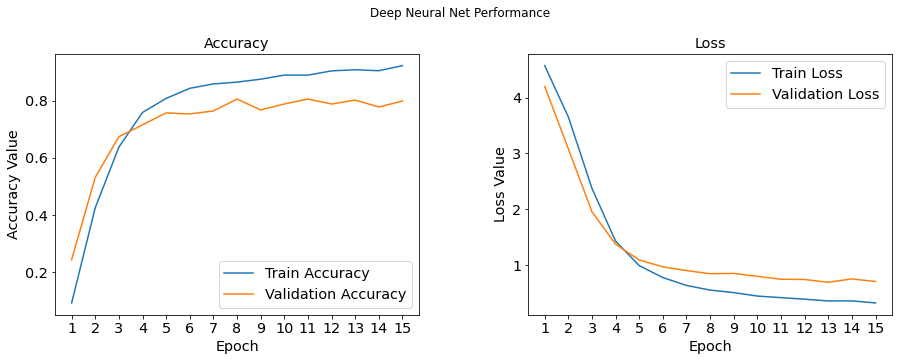

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,16))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#30. Test Model Performance


*   Prepare the testing data in similar way as training data
*   Scaling is very iportant as deep network models are very sensitive




In [ ]:
# scaling test features
x_test /= 255.

# 31.Perform predictions

In [ ]:
test_predictions = model.predict(x_test)
test_predictions

array([[1.80748611e-04, 6.61015103e-04, 3.16913152e-04, ...,
        1.29683572e-03, 7.39610940e-02, 3.60700558e-03],
       [3.16890422e-04, 1.16992676e-04, 4.69449384e-04, ...,
        7.73877978e-01, 6.72506794e-05, 2.95049886e-05],
       [4.24679485e-04, 2.37559224e-03, 5.86556096e-04, ...,
        2.18519140e-02, 3.62939580e-04, 3.04145360e-04],
       ...,
       [1.33148293e-04, 1.63014538e-05, 2.91374396e-04, ...,
        1.21408602e-05, 3.55139491e-05, 7.39578754e-05],
       [1.00447523e-05, 1.26464670e-07, 2.58775344e-06, ...,
        1.17546142e-06, 1.40158491e-07, 1.05359743e-06],
       [1.47355400e-04, 1.92166801e-04, 4.14631213e-04, ...,
        1.42902063e-05, 2.74824870e-05, 1.13017682e-03]], dtype=float32)

#32.Display predictions corresponding to each class

In [ ]:
predictions = pd.DataFrame(test_predictions, columns=labels_ohe_names.columns)
predictions.head()


,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0.000181,0.000661,0.000317,0.360679,0.000292,0.000144,0.006037,0.000058,0.000127,0.000030,...,0.000452,0.000135,0.010287,0.000469,0.000805,4.412419e-04,0.000226,0.001297,0.073961,0.003607
1,0.000317,0.000117,0.000469,0.000627,0.000320,0.000041,0.000082,0.001063,0.000232,0.000027,...,0.000082,0.000102,0.002781,0.002022,0.000182,9.191136e-04,0.000009,0.773878,0.000067,0.000030
2,0.000425,0.002376,0.000587,0.000190,0.000017,0.000021,0.000137,0.000063,0.000074,0.000010,...,0.000177,0.000016,0.000157,0.000041,0.000023,6.724662e-04,0.000020,0.021852,0.000363,0.000304
3,0.000242,0.000221,0.000034,0.000083,0.000045,0.000004,0.000033,0.000008,0.000127,0.000029,...,0.492621,0.000008,0.000104,0.000403,0.000004,6.405914e-07,0.000005,0.000019,0.000192,0.000776
4,0.000139,0.000153,0.000369,0.000148,0.000011,0.071027,0.000184,0.000221,0.000331,0.000366,...,0.000007,0.000059,0.000044,0.000162,0.000013,1.552857e-03,0.000048,0.000012,0.000065,0.000077


#33. Display prediction output for first 10 data items in 

In [ ]:
test_labels = list(y_test)
predictions = list(predictions.idxmax(axis=1))
predictions[:10]

['airedale',
 'whippet',
 'borzoi',
 'toy_poodle',
 'bernese_mountain_dog',
 'bernese_mountain_dog',
 'irish_setter',
 'pembroke',
 'bouvier_des_flandres',
 'old_english_sheepdog']

Analyze Test Performance